In [1]:
# Sample API
import flowx
import simulation
flowx.__version__

'0.1.dev'

In [2]:
# Define grid parameters
nx, ny = 100, 200
xmin, xmax = -2.5, 2.5
ymin, ymax = -9.0, 1.0

# Define cell-centered variable names
center_vars   = ['pres', 'divv', 'ibmf']
face_vars     = ['velc', 'hvar', 'ibmf']
ins_vars      = ['velc', 'hvar', 'divv', 'pres']
poisson_vars  = ['pres', 'divv']
imbound_vars  = ['ibmf', 'velc']

scalar_info   = dict(tmax = 8, dt = 0.001, Re = 100.0)

simulation_info = dict(time_stepping = 'ab2', 
                       poisson_solver = 'serial_lu', 
                       maxiter = 2000,
                       tol = 1e-10,
                       with_ib = True,
                       mapping_type = 'ann',
                       ntrees = 20, 
                       nquery_trees = 2, 
                       nquery_trace = 2)

particle_info = [dict(file='sm_body.00001.h5', vel = [0.0,-1.0])]

# Define boundary conditions for variable pressure and velocity [left, right, bottom, top]
bc_type_center = dict(pres = ['neumann', 'neumann', 'neumann', 'neumann'])
bc_val_center  = dict(pres = [0.0, 0.0, 0.0, 0.0])

bc_type_facex = dict(velc = ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet'])
bc_val_facex  = dict(velc = [0.0, 0.0, 0.0, 0.0])

bc_type_facey = dict(velc = ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet'])
bc_val_facey  = dict(velc =[0.0, 0.0, 0.0, 0.0])

# Create the grid and data
gridc, gridx, gridy, scalars, particles = flowx.serial.domain_main(nx, ny, xmin, xmax, ymin, ymax,
                                              center_vars, face_vars, scalar_info, particle_info, 
                                              bc_type_center=bc_type_center, bc_val_center=bc_val_center,
                                              bc_type_facex=bc_type_facex, bc_val_facex=bc_val_facex,
                                              bc_type_facey=bc_type_facey, bc_val_facey=bc_val_facey)

domain_data_struct = [gridc, gridx, gridy, scalars, particles]

poisson = flowx.poisson_main(gridc, poisson_vars, simulation_info)

imbound = flowx.imbound_main(domain_data_struct, imbound_vars, simulation_info)

ins = flowx.ins_main(poisson, imbound, domain_data_struct, ins_vars, simulation_info)

In [3]:
while scalars.time <= scalars.tmax:
    
    imbound.map_to_grid()

    ins.advance()

    for particle in particles:
        particle.advance()

    scalars.advance()
    
    # Display stats
    if scalars.nstep % 1 == 0:
        print("Level Set Mapping Time: ",imbound._mapping_time)
        flowx.io.display_stats(scalars) 
        
    if scalars.nstep % 100 == 0:
        flowx.io.plot_contour(gridc, 'pres')
        flowx.io.plot_contour(gridx, 'velc')
        flowx.io.plot_vector(gridx,gridy,'velc')
              

Level Set Mapping Time:  1.9739370346069336
------------ Time = 0.001 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6155799784668474e-09
Total poisson time : 0.0048978328704833984
Total INS time : 0.011636972427368164
Max, Min, U   : 0.49835782217809765, -0.49835782217809765
Max, Min, V   : 0.46538348307912053, -0.6212336509794255
Max, Min, P   : 188.18701403800205, -342.6350424218275
Max, Min, DIV : 1.4699352846037073e-13, -1.8207657603852567e-13


Level Set Mapping Time:  2.037799835205078
------------ Time = 0.002 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.053817075124554e-10
Total poisson time : 0.004681825637817383
Total INS time : 0.009521245956420898
Max, Min, U   : 0.7690968322472627, -0.7690968322472631
Max, Min, V   : 0.7362578580207122, -0.8860533545903064
Max, Min, P   : 106.04467635730921, -194.51677876678474
Max, Min, DIV : 1.2434497875801753e-13, -1.1857181902996672e-13


Level Set Mapping Time:  

Level Set Mapping Time:  1.917175054550171
------------ Time = 0.01800000000000001 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.9173076212755795e-12
Total poisson time : 0.010117053985595703
Total INS time : 0.017786026000976562
Max, Min, U   : 1.1306542142734408, -1.130654214273441
Max, Min, V   : 1.0808889413990053, -1.01068717652889
Max, Min, P   : 0.45633223268134276, -2.0222324495201214
Max, Min, DIV : 3.552713678800501e-15, -3.686287386450715e-15




KeyboardInterrupt: 

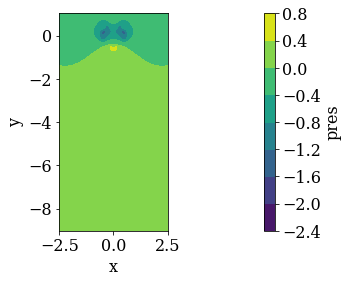

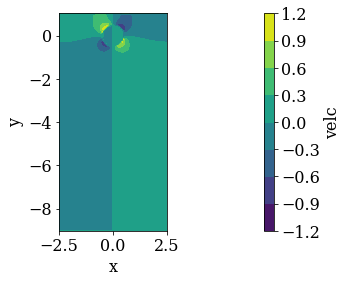

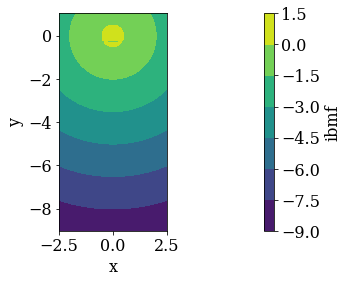

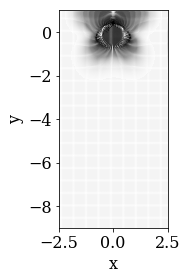

In [4]:
flowx.io.plot_contour(gridc, 'pres')
flowx.io.plot_contour(gridx, 'velc')
flowx.io.plot_contour(gridx, 'ibmf')
flowx.io.plot_vector(gridx,gridy,'velc')